# **Final Project**

## **Weather Prediction**
### Brittany Gouws, Jame Roy, Jelani Machen




##### This is a Past Weather dataset which provides weather data at Boston Logan Airport from 1996 until 2023. We will try use this data to predict if the next week of weather.

##### The CORE columns we will be using are as follows:    

*   **PRCP:** Precipitation
*   **SNOW:** Snowfall (Inches)
*   **SNWD:** Snow Depth (Inches)
*   **TMAX:** Maximum Temperature (Fahrenheit)
*   **TMIN:** Minimum Temperature (Fahrenheit)

### **Data Source:**

#### We went to a website called NOAA and chose the parameters for our data. We used the weather station at Boston Logan International Airport and chose the time frame of 1996-2023.

#### https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/locations/CITY:US250002/detail/


In [245]:
pip install plotly

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from plotly.offline import init_notebook_mode

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from datetime import datetime

### **Read in Dataset**

In [247]:
from google.colab import files
uploaded = files.upload()

Saving Weather.csv to Weather (2).csv


In [248]:
weather = pd.read_csv('Weather.csv', index_col= 'DATE')

weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
1996-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",100.0,100.0,10.07,1223.0,1436.0,0.00,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1996-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",100.0,100.0,12.08,2221.0,2037.0,0.14,2.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1996-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",100.0,100.0,19.01,650.0,712.0,0.94,10.6,16.0,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
1996-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",60.0,30.0,15.21,112.0,48.0,0.04,0.4,21.0,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
1996-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",20.0,20.0,19.46,1552.0,1628.0,0.00,0.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
weather.describe()

,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
count,91.000000,91.000000,10207.000000,5773.000000,5016.000000,10206.000000,10208.000000,2211.000000,6578.000000,10208.000000,...,19.0,2329.0,468.0,16.0,2644.0,28.0,702.0,38.0,2.0,92.0
mean,64.505495,67.362637,10.971069,1434.102546,1369.211722,0.119753,0.127459,0.517413,52.885832,59.918789,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,31.807188,36.601007,3.756230,862.047740,605.581844,0.327762,0.955692,2.415830,17.045384,18.126510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,40.000000,30.000000,8.280000,1059.000000,1027.000000,0.000000,0.000000,0.000000,40.000000,45.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,70.000000,90.000000,10.290000,1448.000000,1438.000000,0.000000,0.000000,0.000000,53.000000,60.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,90.000000,100.000000,13.085000,1755.000000,1758.000000,0.060000,0.000000,0.000000,67.000000,75.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,100.000000,100.000000,38.030000,9999.000000,2359.000000,6.110000,23.600000,31.000000,90.000000,103.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [250]:
weather.count()

STATION    10209
NAME       10209
ACMH          91
ACSH          91
AWND       10207
FMTM        5773
PGTM        5016
PRCP       10206
SNOW       10208
SNWD        2211
TAVG        6578
TMAX       10208
TMIN       10208
TSUN         429
WDF1          91
WDF2       10113
WDF5       10092
WDFG          90
WESD        5479
WSF1          91
WSF2       10113
WSF5       10092
WSFG          90
WT01        3862
WT02         544
WT03         466
WT04         139
WT05         388
WT06          73
WT07          61
WT08        1010
WT09         114
WT10           1
WT11          19
WT13        2329
WT14         468
WT15          16
WT16        2644
WT17          28
WT18         702
WT19          38
WT21           2
WT22          92
dtype: int64

### **Clean Data**

#### Find percent of column that has null/ missing values

In [251]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.991086
ACSH       0.991086
AWND       0.000196
FMTM       0.434519
PGTM       0.508669
PRCP       0.000294
SNOW       0.000098
SNWD       0.783426
TAVG       0.355667
TMAX       0.000098
TMIN       0.000098
TSUN       0.957978
WDF1       0.991086
WDF2       0.009403
WDF5       0.011460
WDFG       0.991184
WESD       0.463317
WSF1       0.991086
WSF2       0.009403
WSF5       0.011460
WSFG       0.991184
WT01       0.621706
WT02       0.946714
WT03       0.954354
WT04       0.986385
WT05       0.961994
WT06       0.992849
WT07       0.994025
WT08       0.901068
WT09       0.988833
WT10       0.999902
WT11       0.998139
WT13       0.771868
WT14       0.954158
WT15       0.998433
WT16       0.741013
WT17       0.997257
WT18       0.931237
WT19       0.996278
WT21       0.999804
WT22       0.990988
dtype: float64

### **Select Core Columns**

In [252]:
core_values = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_values.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [253]:
core_values

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-01-01,0.00,0.0,8.0,36.0,32.0
1996-01-02,0.14,2.0,8.0,34.0,24.0
1996-01-03,0.94,10.6,16.0,32.0,15.0
1996-01-04,0.04,0.4,21.0,22.0,14.0
1996-01-05,0.00,0.0,18.0,24.0,4.0
...,...,...,...,...,...
2023-12-09,0.00,0.0,NaN,52.0,33.0
2023-12-10,0.52,0.0,NaN,62.0,44.0
2023-12-11,1.75,0.0,NaN,64.0,37.0


### **Look for Null Values Again**
#### What is the percentage within that column that is made of null values?

In [254]:
core_values.apply(pd.isnull).sum()/core_values.shape[0]

precip        0.000294
snow          0.000098
snow_depth    0.783426
temp_max      0.000098
temp_min      0.000098
dtype: float64

### **We need to determine if we will actually get useful information from these core values**

#### We will do this for all the core values to decide whether or not to keep them.

In [255]:
core_values["snow"].value_counts()

0.0    9615
0.1      67
0.2      57
0.3      52
0.4      33
       ... 
7.9       1
7.6       1
8.9       1
4.1       1
8.5       1
Name: snow, Length: 101, dtype: int64

#### This shows us how many days had certain amounts of snow.

In [256]:
core_values["snow_depth"].value_counts()

0.0     1993
1.0       50
2.0       41
3.0       36
4.0       22
8.0       11
5.0        9
7.0        7
6.0        5
17.0       4
9.0        4
15.0       3
18.0       3
10.0       3
14.0       3
12.0       3
13.0       3
19.0       2
16.0       2
29.0       2
20.0       1
31.0       1
30.0       1
24.0       1
21.0       1
Name: snow_depth, dtype: int64

#### **Above shows us that we cannot really use this column to predict things as there are many values of 0. We will delete this column.**

In [257]:
del core_values["snow_depth"]

In [258]:
core_values[pd.isnull(core_values["precip"])]

,precip,snow,temp_max,temp_min
DATE,,,,
2003-08-23,NaN,0.0,84.0,65.0
2003-08-24,NaN,0.0,76.0,60.0
2023-12-13,NaN,NaN,NaN,NaN


In [259]:
core_values.loc["1996-01-01":"2023-12-11"  ,:]

,precip,snow,temp_max,temp_min
DATE,,,,
1996-01-01,0.00,0.0,36.0,32.0
1996-01-02,0.14,2.0,34.0,24.0
1996-01-03,0.94,10.6,32.0,15.0
1996-01-04,0.04,0.4,22.0,14.0
1996-01-05,0.00,0.0,24.0,4.0
...,...,...,...,...
2023-12-07,0.00,0.0,34.0,21.0
2023-12-08,0.00,0.0,42.0,27.0
2023-12-09,0.00,0.0,52.0,33.0


In [260]:
core_values["precip"].value_counts()

0.00    6621
0.01     393
0.02     204
0.03     172
0.05     126
        ... 
1.31       1
1.86       1
1.77       1
2.29       1
1.98       1
Name: precip, Length: 224, dtype: int64

#### There are only 3 days when precipitation had null values.

#### **We can also see that the date 2023-12-13 is all null values. We need to drop this row.**

In [261]:
core_values.drop(index='2023-12-13', inplace=True)

In [262]:
core_values["precip"].value_counts

<bound method IndexOpsMixin.value_counts of DATE
1996-01-01    0.00
1996-01-02    0.14
1996-01-03    0.94
1996-01-04    0.04
1996-01-05    0.00
              ... 
2023-12-08    0.00
2023-12-09    0.00
2023-12-10    0.52
2023-12-11    1.75
2023-12-12    0.00
Name: precip, Length: 10208, dtype: float64>

#### As we can see, there are over 6500 days that had no precipitation, so we want both those values and the null values to be 0.

In [264]:
core_values["precip"] = core_values["precip"].fillna(0)

#### We need to make sure that the Temp_max and temp_min have no null values or those values are replaced. We just move forward if there are no null values.

In [265]:
core_values[pd.isnull(core_values["temp_max"])]

,precip,snow,temp_max,temp_min
DATE,,,,


In [266]:
core_values[pd.isnull(core_values["temp_min"])]

,precip,snow,temp_max,temp_min
DATE,,,,


### **Let's check one final time if we have missing values.**

In [267]:
core_values.apply(pd.isnull).sum()/core_values.shape[0]

precip      0.0
snow        0.0
temp_max    0.0
temp_min    0.0
dtype: float64

### **We will look at our data types to ensure we can use them effectively.**

In [268]:
core_values.dtypes

precip      float64
snow        float64
temp_max    float64
temp_min    float64
dtype: object

In [269]:
core_values.index

Index(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04', '1996-01-05',
       '1996-01-06', '1996-01-07', '1996-01-08', '1996-01-09', '1996-01-10',
       ...
       '2023-12-03', '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
       '2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12'],
      dtype='object', name='DATE', length=10208)

#### **Let's turn our index into a date/time index.**

In [270]:
core_values.index = pd.to_datetime(core_values.index)

#### **Let's confirm we made it into a date/time index.**

In [271]:
core_values.index.year

Int64Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=10208)

In [272]:
core_values.apply(lambda x: (x == 9999).sum())

precip      0
snow        0
temp_max    0
temp_min    0
dtype: int64

### **We will now start analyzing our data.**

#### **We will plot our core values to see if there is something going on that our cleaning did not fix.**

<Axes: xlabel='DATE'>

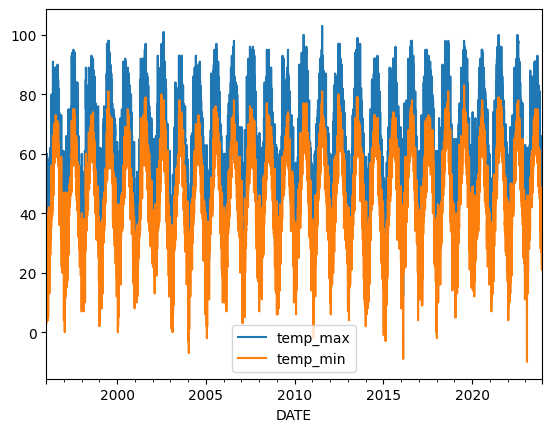

In [273]:
core_values[["temp_max", "temp_min"]].plot()

#### Looks Good

<Axes: xlabel='DATE'>

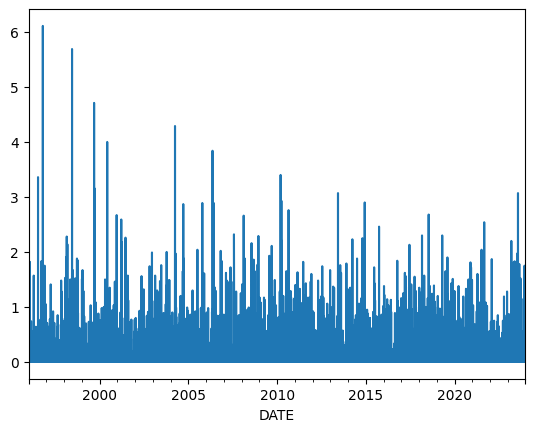

In [274]:
core_values['precip'].plot()

<Axes: xlabel='DATE'>

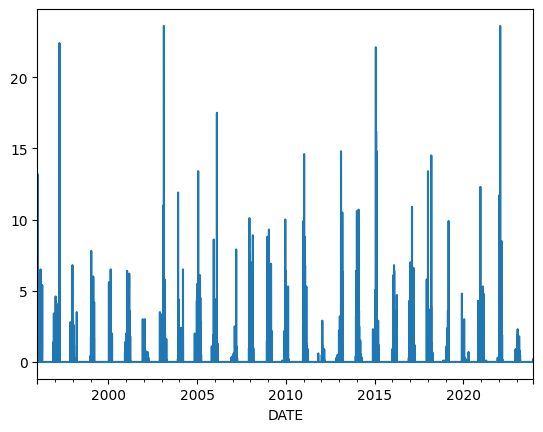

In [275]:
core_values["snow"].plot()

### This looks a little strange, so let's look at the values of each year to see if we have fewer values in that year.

In [276]:
core_values.index.year.value_counts().sort_index()

1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    346
Name: DATE, dtype: int64

### We have determined that the data is accurate, and that we are not missing values.

#### **Let's look at how much it rained and snowed each year.**

In [323]:
core_values.groupby(core_values.index.year).sum()[["precip","snow"]]

,precip,snow
DATE,,
1996,45.14,47.5
1997,30.39,56.8
1998,53.67,14.7
1999,37.91,35.6
2000,45.60,29.4
2001,30.72,46.4
2002,41.07,24.8
2003,44.37,77.7
2004,44.57,29.0


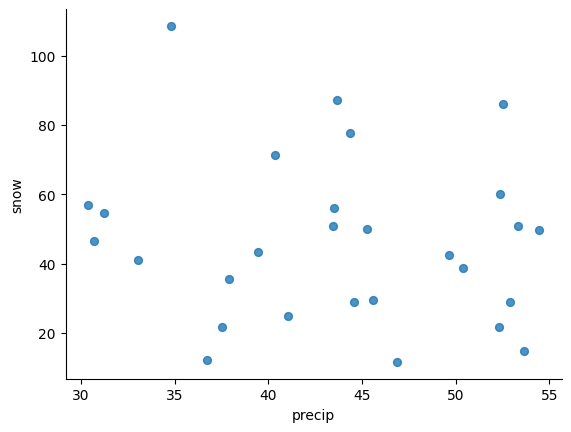

In [322]:
from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='precip', y='snow', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

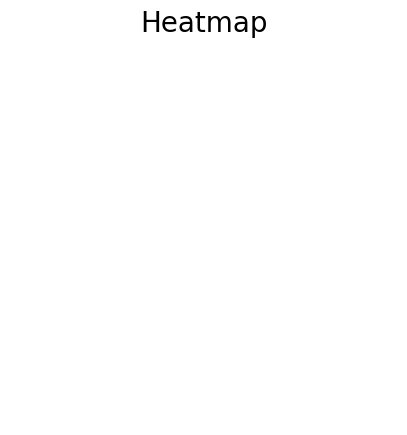

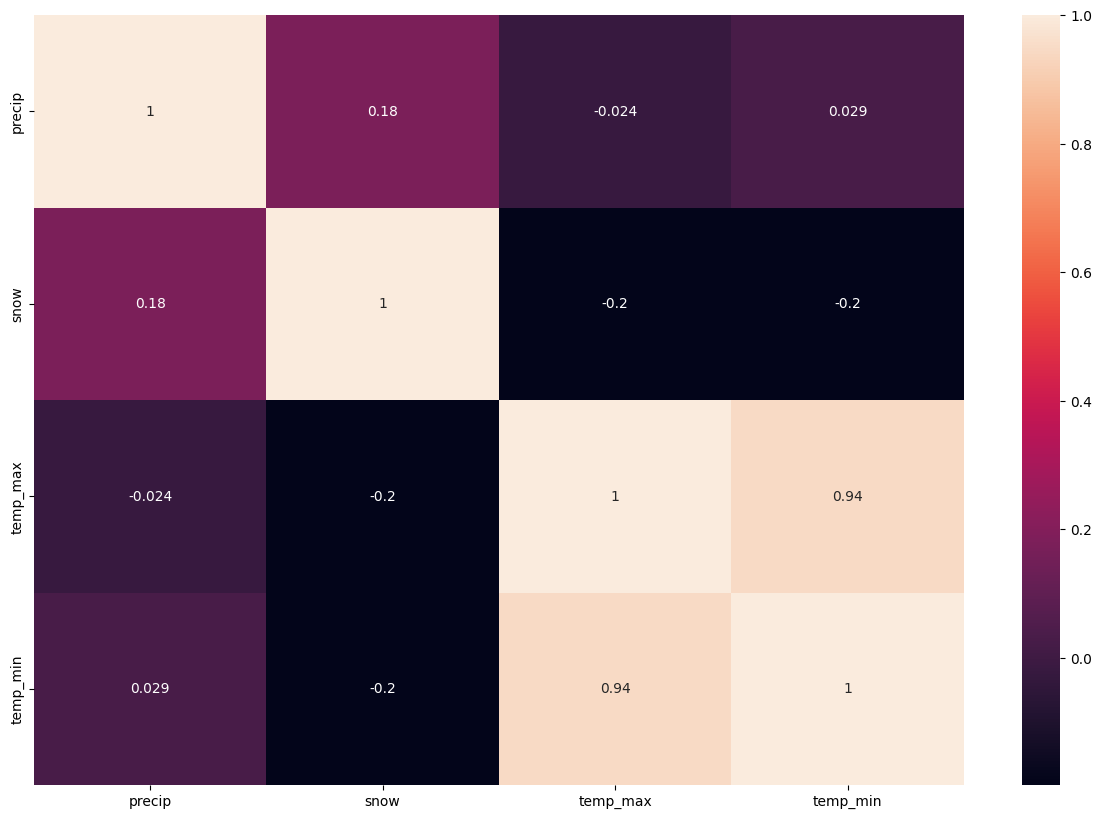

In [278]:
fig, ax = plt.subplots(figsize = (5,5))
title = "Heatmap"
plt.title(title, fontsize = 20)
ttl = ax.title
ttl.set_position([0.5,1.05])

ax.set_xticks([])
ax.set_yticks([])

ax.axis('off')

correlation = core_values.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True)

## **Moving onto Machine Learning**

#### **What are we trying to predict?**

In [279]:
core_values["target"] = core_values.shift(-1)["temp_max"]

In [280]:
core_values

,precip,snow,temp_max,temp_min,target
DATE,,,,,
1996-01-01,0.00,0.0,36.0,32.0,34.0
1996-01-02,0.14,2.0,34.0,24.0,32.0
1996-01-03,0.94,10.6,32.0,15.0,22.0
1996-01-04,0.04,0.4,22.0,14.0,24.0
1996-01-05,0.00,0.0,24.0,4.0,19.0
...,...,...,...,...,...
2023-12-08,0.00,0.0,42.0,27.0,52.0
2023-12-09,0.00,0.0,52.0,33.0,62.0
2023-12-10,0.52,0.0,62.0,44.0,64.0


### There is a null value because we don't have the target value for today.

In [281]:
core_values = core_values.iloc[:-1,:].copy()

In [282]:
core_values

,precip,snow,temp_max,temp_min,target
DATE,,,,,
1996-01-01,0.00,0.0,36.0,32.0,34.0
1996-01-02,0.14,2.0,34.0,24.0,32.0
1996-01-03,0.94,10.6,32.0,15.0,22.0
1996-01-04,0.04,0.4,22.0,14.0,24.0
1996-01-05,0.00,0.0,24.0,4.0,19.0
...,...,...,...,...,...
2023-12-07,0.00,0.0,34.0,21.0,42.0
2023-12-08,0.00,0.0,42.0,27.0,52.0
2023-12-09,0.00,0.0,52.0,33.0,62.0


### **Ridge Regression Model**

In [283]:
reg = Ridge(alpha = .1)

In [284]:
predictors = ["precip", "temp_max", "temp_min"]


### **Split into Training and Testing set using the 80:20 Ratio**

In [285]:
train = core_values.loc[:"2018-12-31"]

In [286]:
test = core_values.loc["2019-01-01":]

In [287]:
train

,precip,snow,temp_max,temp_min,target
DATE,,,,,
1996-01-01,0.00,0.0,36.0,32.0,34.0
1996-01-02,0.14,2.0,34.0,24.0,32.0
1996-01-03,0.94,10.6,32.0,15.0,22.0
1996-01-04,0.04,0.4,22.0,14.0,24.0
1996-01-05,0.00,0.0,24.0,4.0,19.0
...,...,...,...,...,...
2018-12-27,0.00,0.0,38.0,30.0,57.0
2018-12-28,0.33,0.0,57.0,34.0,54.0
2018-12-29,0.00,0.0,54.0,32.0,34.0


In [288]:
test

,precip,snow,temp_max,temp_min,target
DATE,,,,,
2019-01-01,0.38,0.0,59.0,34.0,37.0
2019-01-02,0.00,0.0,37.0,28.0,46.0
2019-01-03,0.02,0.0,46.0,32.0,48.0
2019-01-04,0.00,0.0,48.0,34.0,43.0
2019-01-05,0.53,0.0,43.0,38.0,47.0
...,...,...,...,...,...
2023-12-07,0.00,0.0,34.0,21.0,42.0
2023-12-08,0.00,0.0,42.0,27.0,52.0
2023-12-09,0.00,0.0,52.0,33.0,62.0


In [289]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [290]:
predictions = reg.predict(test[predictors])

In [291]:
from sklearn.metrics import mean_absolute_error

In [292]:
mean_absolute_error(test["target"], predictions)

6.363288940173681

### **This shows that we were on average 6.3 Degrees off our temperature prediction.**

#### **There is more work we can do to make it more accurate.**

In [293]:
combination = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combination.columns = ["Actual Temperature", "Predicted Temperature"]

In [294]:
combination

,Actual Temperature,Predicted Temperature
DATE,,
2019-01-01,37.0,53.147293
2019-01-02,46.0,41.170922
2019-01-03,48.0,47.198433
2019-01-04,43.0,49.169777
2019-01-05,47.0,47.694595
...,...,...
2023-12-07,42.0,36.228888
2023-12-08,52.0,42.888432
2023-12-09,62.0,50.440851


<Axes: xlabel='DATE'>

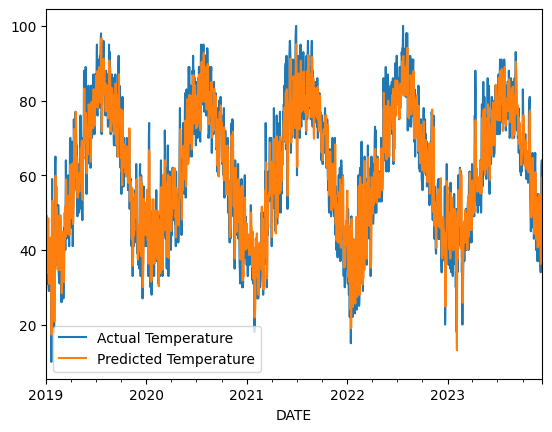

In [295]:
combination.plot()

### **So what it looks like on the plot is that our predictions seem to avoid the extremes. Almost every year, the actual maximum and minimum temperature is higher and lower than the predicted temperature.**

### These co-efficients show us how the model is using the values to predict the temperature. As we can see, **precipitation** and **snow** have negative impacts on the prediction, which makes sense scientifically.

In [296]:
reg.coef_

array([-2.45603007,  0.44643704,  0.51467471])

#### It seems that Minimum Temperature has more of an impact on our prediction than Maximum temperature, which might be why we're so far off in our predicted temperature.

In [297]:
def create_predictions(predictors, core_values, reg):
    train = core_values.loc[:"2015-12-31"]
    test = core_values.loc["2016-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_absolute_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["Actual Temperature", "Predicted Temperature"]
    return error, combined

In [299]:
core_values["month_max"] = core_values["temp_max"].rolling(30).mean()

In [300]:
core_values

,precip,snow,temp_max,temp_min,target,month_max
DATE,,,,,,
1996-01-01,0.00,0.0,36.0,32.0,34.0,NaN
1996-01-02,0.14,2.0,34.0,24.0,32.0,NaN
1996-01-03,0.94,10.6,32.0,15.0,22.0,NaN
1996-01-04,0.04,0.4,22.0,14.0,24.0,NaN
1996-01-05,0.00,0.0,24.0,4.0,19.0,NaN
...,...,...,...,...,...,...
2023-12-07,0.00,0.0,34.0,21.0,42.0,47.766667
2023-12-08,0.00,0.0,42.0,27.0,52.0,47.433333
2023-12-09,0.00,0.0,52.0,33.0,62.0,47.633333


In [301]:
#lets check how different is the monthly average temperature from the temperature in a given day:
core_values["month_day_max"] = core_values["month_max"] / core_values["temp_max"]

In [303]:
core_values["max_min"] = core_values["temp_max"] / core_values["temp_min"]

In [309]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max"]

In [306]:
core_values = core_values.iloc[30:,:].copy()

In [307]:
print(core_values[core_values.isin([np.nan, np.inf, -np.inf]).any(1)])

            precip  snow  temp_max  temp_min  target  month_max  \
DATE                                                              
1997-01-19     0.0   0.0      19.0       0.0    34.0  38.566667   
2000-01-17     0.0   0.0      17.0       0.0    22.0  40.733333   
2003-02-14     0.0   0.0      21.0       0.0    15.0  29.466667   
2003-02-16     0.0   0.0      15.0       0.0    28.0  28.533333   
2018-01-01     0.0   0.0      13.0       0.0    19.0  35.066667   

            month_day_max  max_min  
DATE                                
1997-01-19       2.029825      inf  
2000-01-17       2.396078      inf  
2003-02-14       1.403175      inf  
2003-02-16       1.902222      inf  
2018-01-01       2.697436      inf  


#### I removed MAX_MIN because the infinite values did not allow our code to run because it was bigger than float64

In [310]:
error, combination = create_predictions(predictors, core_values, reg)

In [311]:
error

6.304756280353345

#### This means we are 6.3 Degrees off the actual temperature in our prediction.

In [312]:
core_values["monthly_avg"] = core_values["temp_max"].groupby(core_values.index.month).apply(lambda x: x.expanding(1).mean())
core_values["day_of_year_avg"] = core_values["temp_max"].groupby(core_values.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [313]:
core_values

,precip,snow,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
1996-01-31,0.06,1.1,35.0,18.0,24.0,37.600000,1.074286,1.944444,35.000000,35.000000
1996-02-01,0.00,0.0,24.0,11.0,30.0,37.266667,1.552778,2.181818,24.000000,24.000000
1996-02-02,0.03,0.5,30.0,22.0,23.0,37.200000,1.240000,1.363636,27.000000,30.000000
1996-02-03,0.39,4.5,23.0,11.0,14.0,37.233333,1.618841,2.090909,25.666667,23.000000
1996-02-04,0.00,0.0,14.0,4.0,19.0,36.900000,2.635714,3.500000,22.750000,14.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-07,0.00,0.0,34.0,21.0,42.0,47.766667,1.404902,1.619048,42.853081,43.642857
2023-12-08,0.00,0.0,42.0,27.0,52.0,47.433333,1.129365,1.555556,42.852071,40.178571
2023-12-09,0.00,0.0,52.0,33.0,62.0,47.633333,0.916026,1.575758,42.862884,40.821429


#### Let's try lower our error by updating our predictors!

In [314]:
error, combination = create_predictions(predictors, core_values, reg)

In [315]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "monthly_avg", "day_of_year_avg"]

In [316]:
error

6.304756280353345

#### Still hasn't changed

In [317]:
reg.coef_

array([-2.01685209,  0.47210512,  0.3280103 ,  0.19377012,  1.45110513])

#### Looking at correlations to see how each value affects our predictions.

In [318]:
core_values.corr()["target"]

precip            -0.041918
snow              -0.198329
temp_max           0.888801
temp_min           0.887951
target             1.000000
month_max          0.839080
month_day_max     -0.342271
max_min           -0.238480
monthly_avg        0.857758
day_of_year_avg    0.871716
Name: target, dtype: float64

In [319]:
combination["Difference"] = (combination["Actual Temperature"] - combination["Predicted Temperature"]).abs()   #absolute difference

In [320]:
combination.sort_values("Difference", ascending=False).head()

,Actual Temperature,Predicted Temperature,Difference
DATE,,,
2023-02-04,51.0,20.426622,30.573378
2016-03-08,77.0,47.845588,29.154412
2021-03-10,74.0,46.286095,27.713905
2018-05-01,89.0,61.485216,27.514784
2016-05-24,88.0,61.594671,26.405329


#### Weather prediction is a very complicated machine learning project as it has so many variables and we could also mention that the world weather follows cycles of decades where there is a full circle effect. Climate Change is also a **HUGE** determining factor that we cannot predict.